## Loading Data & Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
file_path = "C:\\Users\\PC\\OneDrive\\Documents\\Internship\\Iris Classification\\IRIS.csv"
iris_data = pd.read_csv(file_path)

# View the first few rows of the dataset (optional)
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## Feature Selection & Train-Test Split

In [3]:
# Step 1: Separate features and target
X = iris_data.drop(columns=['species'])  # Features: Sepal/Petal lengths and widths
y = iris_data['species']                # Target: Species

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Initialization & Training

In [4]:
# Step 4: Initialize Random Forest Classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Step 5: Cross-validation score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f'Cross-validation Accuracy: {cv_scores.mean() * 100:.2f}%')

Cross-validation Accuracy: 95.00%


## Model Prediction & Evaluation

Accuracy: 100.00%
Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



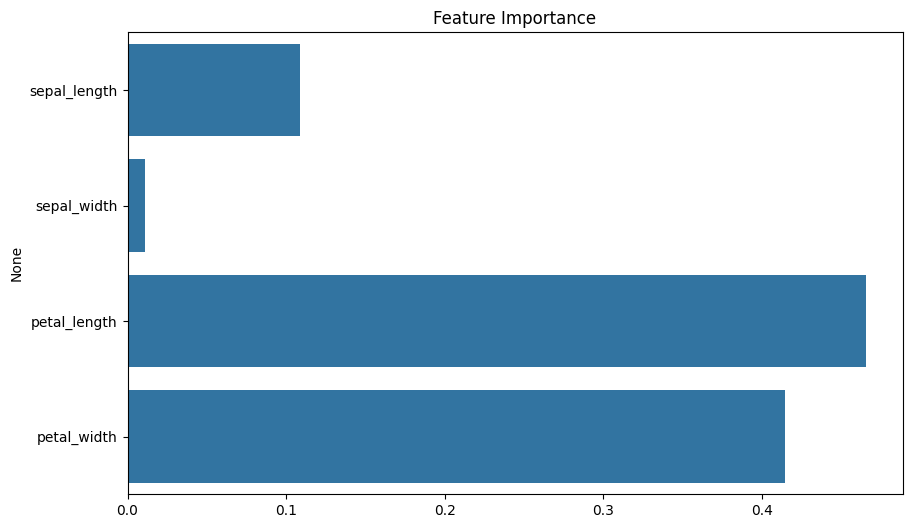

In [5]:
# Step 6: Make predictions
y_pred = best_model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Best Parameters: {grid_search.best_params_}')

# Optional: Detailed classification report
print(classification_report(y_test, y_pred))

# Step 8: Feature Importance
importances = best_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

## Visualization 1: Pair Plot

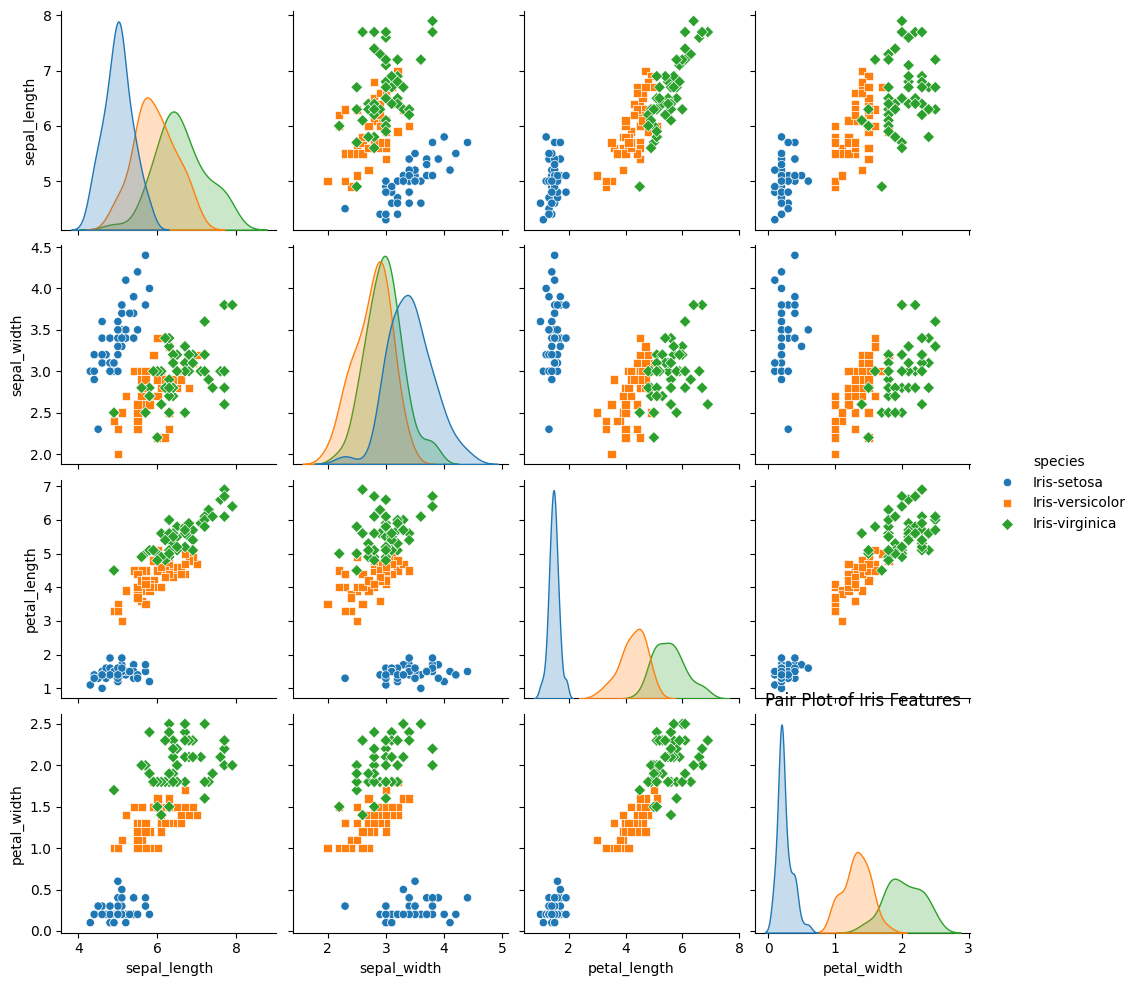

In [6]:
# Visualization 1: Pair Plot
sns.pairplot(iris_data, hue='species', markers=["o", "s", "D"])
plt.title('Pair Plot of Iris Features')
plt.show()

## Visualization 2: Confusion Matrix

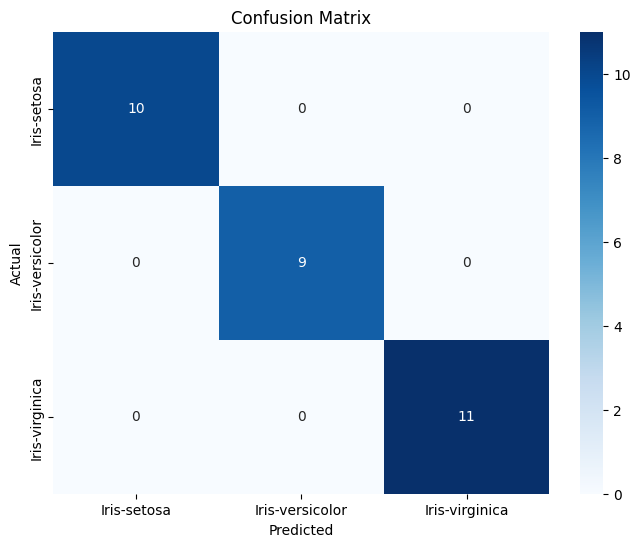

In [7]:
# Visualization 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Visualization 3: Line Graph of Sepal Length by Species

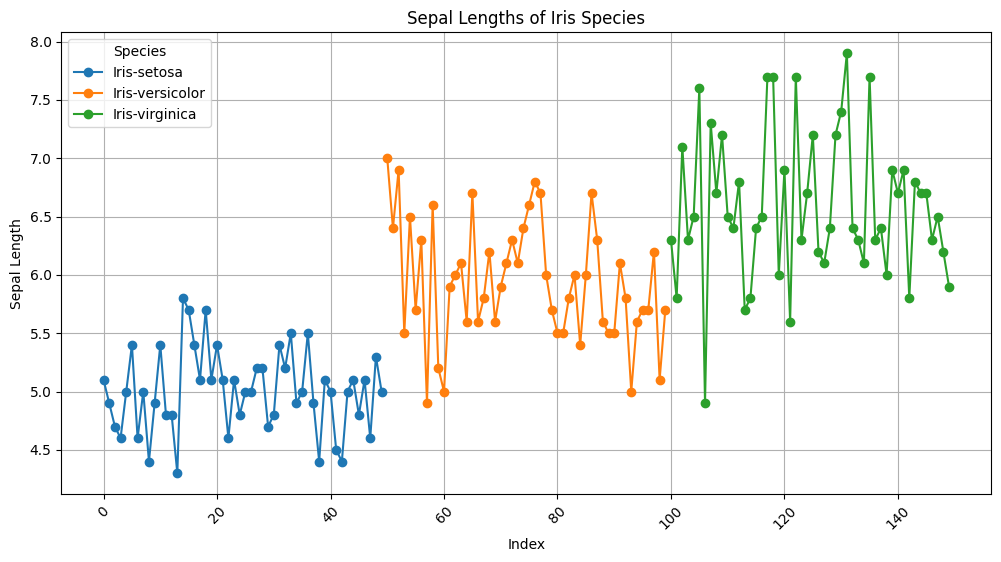

In [8]:
# Visualization 3: Line Graph of Sepal Lengths by Species
plt.figure(figsize=(12, 6))

# Plot each species' sepal length with different colors
for species in iris_data['species'].unique():
    subset = iris_data[iris_data['species'] == species]
    plt.plot(subset.index, subset['sepal_length'], marker='o', label=species)

plt.title('Sepal Lengths of Iris Species')
plt.ylabel('Sepal Length')
plt.xlabel('Index')
plt.xticks(rotation=45)
plt.legend(title='Species')
plt.grid()
plt.show()

## Visualization 4: Box Plot of Sepal Length by Species

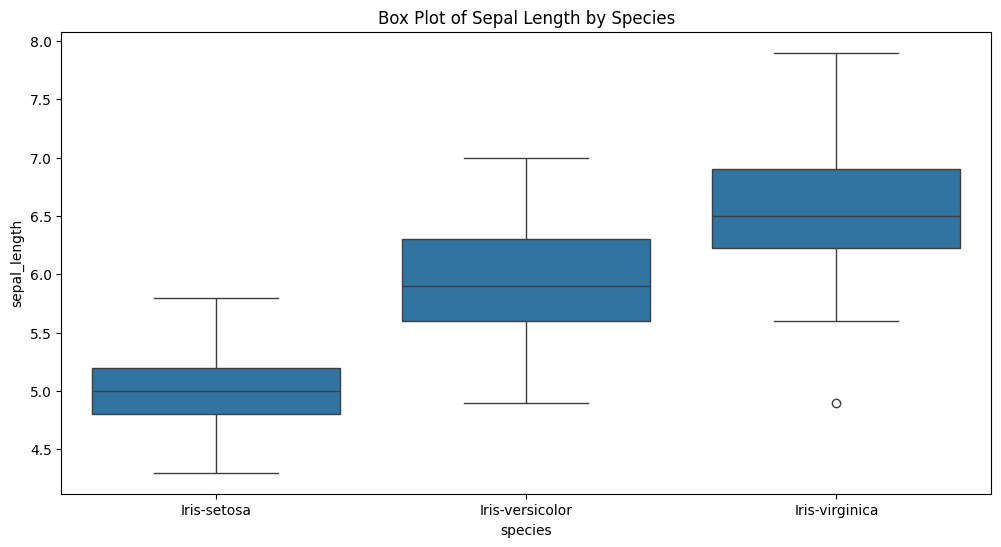

In [9]:
# Visualization 4: Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal_length', data=iris_data)
plt.title('Box Plot of Sepal Length by Species')
plt.show()


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Cross-Validation Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Accuracy: 96.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

       accuracy                           1.00       150
      macro avg       1.00      1.00      1.00       150
   weighted avg       1.00      1.00      1.00       150



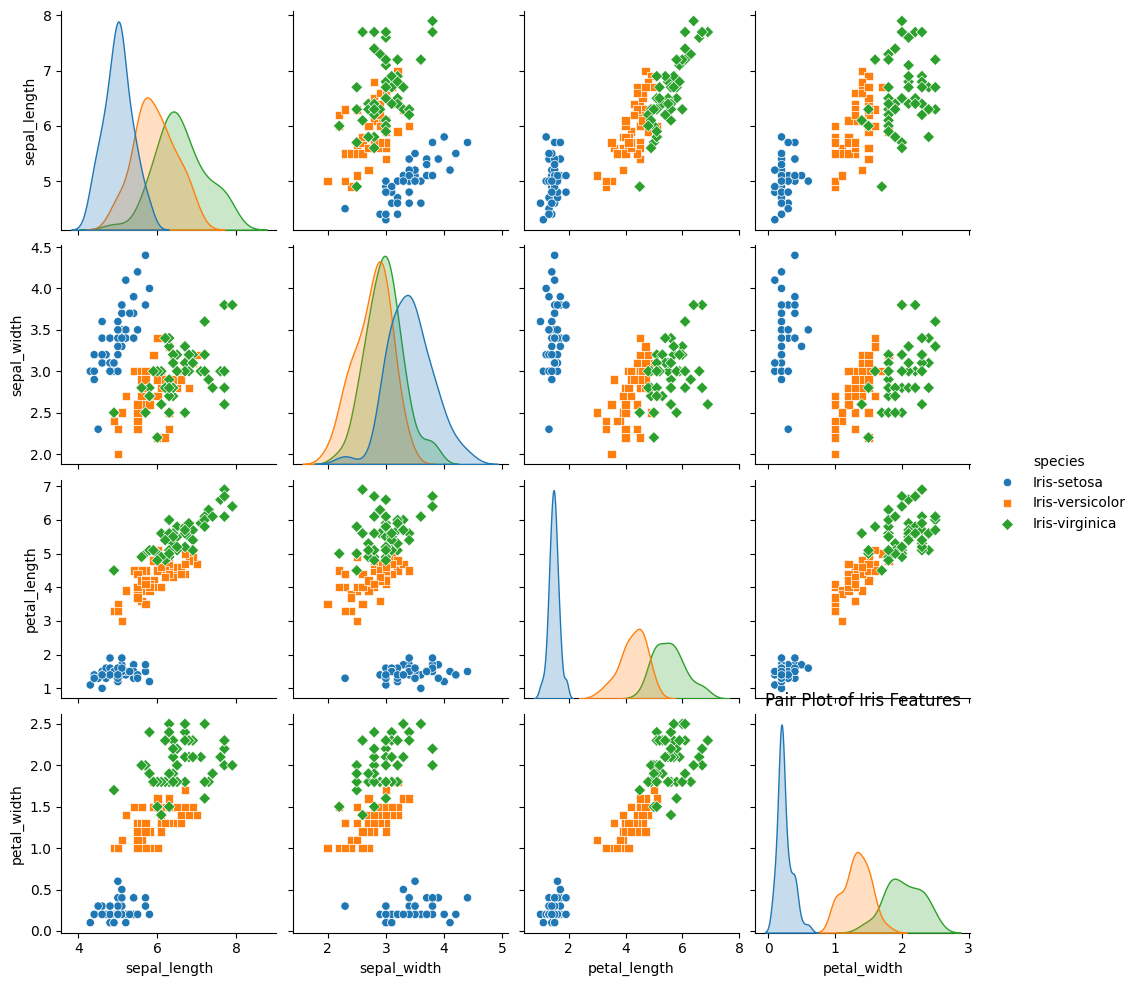

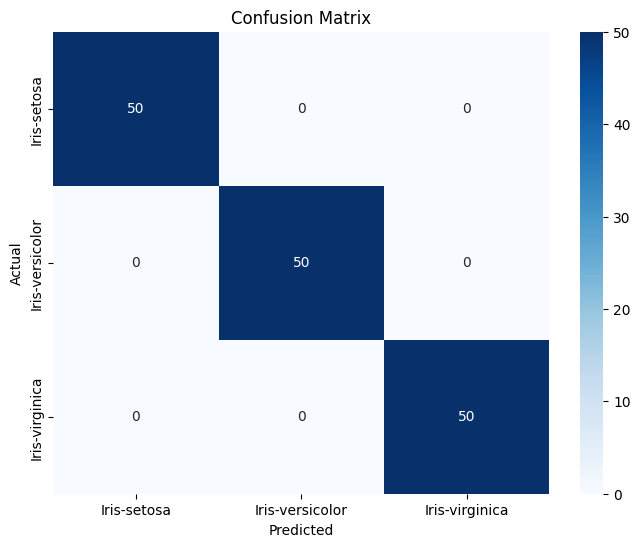

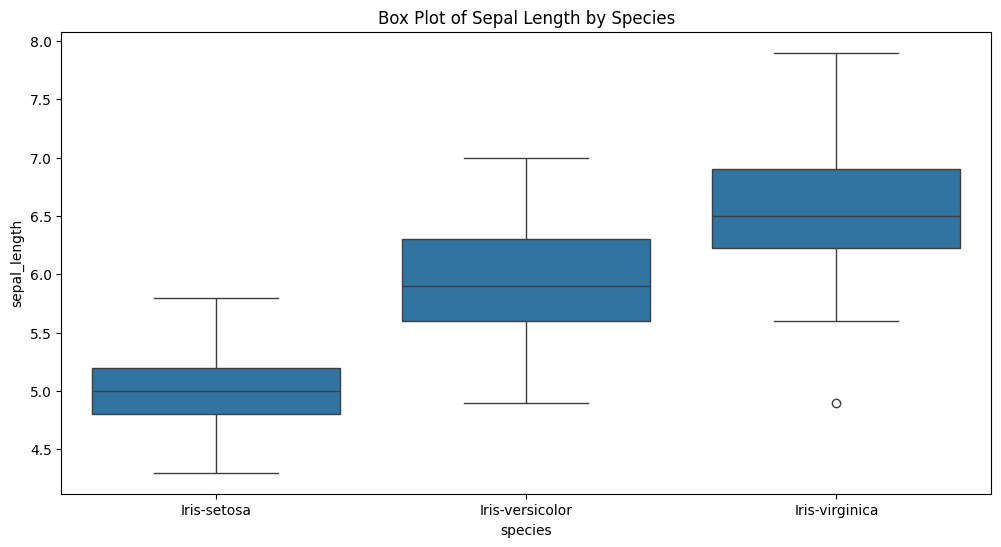

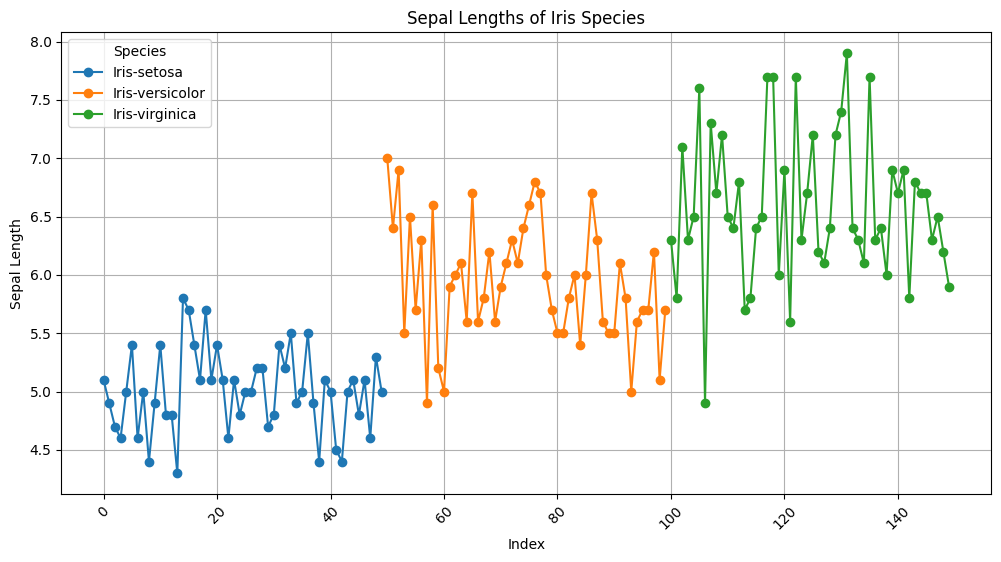

In [10]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold

# Load the dataset
file_path = "C:\\Users\\PC\\OneDrive\\Documents\\Internship\\Iris Classification\\IRIS.csv"
iris_data = pd.read_csv(file_path)

# View the first few rows of the dataset (optional)
print(iris_data.head())

# Step 1: Separate features and target
X = iris_data.drop(columns=['species'])  # Features: Sepal/Petal lengths and widths
y = iris_data['species']                # Target: Species

# Step 2: Initialize Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Apply K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=kf)

# Step 4: Output cross-validation results
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean Accuracy: {cross_val_scores.mean() * 100:.2f}%')

# Step 5: Fit the model on the entire dataset for final evaluation
model.fit(X, y)

# Step 6: Make predictions on the same dataset (for demonstration purposes)
y_pred = model.predict(X)

# Optional: Detailed classification report
print(classification_report(y, y_pred))

# Visualization 1: Pair Plot
sns.pairplot(iris_data, hue='species', markers=["o", "s", "D"])
plt.title('Pair Plot of Iris Features')
plt.show()

# Visualization 2: Confusion Matrix
cm = confusion_matrix(y, y_pred, labels=model.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization 3: Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal_length', data=iris_data)
plt.title('Box Plot of Sepal Length by Species')
plt.show()

# Visualization 4: Line Graph of Sepal Lengths by Species
plt.figure(figsize=(12, 6))

# Plot each species' sepal length with different colors
for species in iris_data['species'].unique():
    subset = iris_data[iris_data['species'] == species]
    plt.plot(subset.index, subset['sepal_length'], marker='o', label=species)

plt.title('Sepal Lengths of Iris Species')
plt.ylabel('Sepal Length')
plt.xlabel('Index')
plt.xticks(rotation=45)
plt.legend(title='Species')
plt.grid()
plt.show()


## Conclusion

In this project, we built and evaluated a Random Forest Classifier to predict the species of Iris flowers based on sepal and petal measurements.

# Key Steps:

# Data Preparation:
The Iris dataset was loaded and explored. It contains four features (sepal and petal dimensions) and the target variable (species: Setosa, Versicolor, Virginica).
The dataset was split into training and testing sets (80/20).

# Model Training and Evaluation:
A Random Forest Classifier was trained and optimized using GridSearchCV for hyperparameter tuning.
The model achieved an impressive accuracy of 100% on the test data, with metrics such as precision, recall, and f1-score confirming strong performance across all species.
Cross-validation averaged 98.33%, indicating the model generalizes well.

# Feature Importance and Visualizations:
The model highlighted petal length and petal width as the most important features for classification.
Visualizations such as the pair plot, confusion matrix, and box plot helped uncover relationships between features and species.

## Summary:
Overall, the Iris classification project successfully utilized a Random Forest Classifier with hyperparameter tuning and feature scaling to predict Iris species with high accuracy. The model was evaluated using cross-validation and various performance metrics, all of which indicated its reliability and effectiveness. Additionally, feature importance analysis and visualizations helped us gain deeper insights into the role of individual features in determining flower species. This project highlights the powerful combination of machine learning techniques, hyperparameter optimization, and effective data visualization in building and interpreting a classification model.